In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

batchnum = 64
# Transform to convert images to PyTorch tensors and normalize them
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data for MNIST
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batchnum, shuffle=True)

Using device: cuda


In [13]:
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.fc1 = nn.Linear(784, 784)  # First layer for MNIST (28x28 images)
        self.fc2 = nn.Linear(784, 784)   # Second layer
        self.fc3 = nn.Linear(784, 784)    # Output layer for 10 classes

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class ExplainableNetwork:
    def __init__(self):
        self.node_inputs = {{}}
        self.node_activations = {}
        self.gradients = {}
        self.current_epoch = 0

    def input_hook(self, module, num_epochs, input, output):
        if self.current_epoch == num_epochs - 1:
            print(input[0].size(dim=0))
            for i in range(0,input[0].size(dim=0)):
                if(np.shape(input[0][i]) == torch.Size([784])):
                    image = input[0][i].detach().reshape(28, 28).cpu().numpy()
                    self.node_inputs.append(image)
                # if(np.shape(input[0][i]) == torch.Size([128])):
                #     image = input[0][i].detach().reshape(8, 16).cpu().numpy()
                #     self.node_inputs.append(image)
                # if(np.shape(input[0][i]) == torch.Size([64])):    
                #     image = input[0][i].detach().reshape(8, 8).cpu().numpy()
                #     self.node_inputs.append(image)

        # Store activation values (outputs)
        if isinstance(output, tuple):
            # If output is a tuple, store each element separately
            for idx, out in enumerate(output):
                self.node_activations[(module, idx)] = out.detach().tolist()
        else:
            # If output is a single tensor, store it directly
            self.node_activations[module] = output.detach().tolist()

    def backward_hook(self, module, grad_input, grad_output):
        # grad_output[0] will contain the gradient of the output with respect to the loss
        self.gradients[module] = grad_output[0].detach().tolist()

    def set_epoch(self, epoch):
        self.current_epoch = epoch

In [14]:


# Instantiate the model
model = MNISTNet().to(device)
xNetwork = ExplainableNetwork()

model.fc1.register_forward_hook(lambda module, input, output, x_Network=xNetwork: xNetwork.input_hook(module, 10, input, output))
model.fc2.register_forward_hook(lambda module, input, output, x_Network=xNetwork: xNetwork.input_hook(module, 10, input, output))
model.fc3.register_forward_hook(lambda module, input, output, x_Network=xNetwork: xNetwork.input_hook(module, 10, input, output))

# Backward hooks
model.fc1.register_backward_hook(lambda module, grad_input, grad_output, x_Network=xNetwork: xNetwork.backward_hook(module, grad_input, grad_output))
model.fc2.register_backward_hook(lambda module, grad_input, grad_output, x_Network=xNetwork: xNetwork.backward_hook(module, grad_input, grad_output))
model.fc3.register_backward_hook(lambda module, grad_input, grad_output, x_Network=xNetwork: xNetwork.backward_hook(module, grad_input, grad_output))

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Train the model
num_epochs = 10
total_batches = len(trainloader)  # Total number of batches

for epoch in range(num_epochs):
    print("Epoch " + str(epoch + 1))

    # Set the current epoch in ExplainableNetwork
    xNetwork.set_epoch(epoch)

    for batch_num, (inputs, labels) in enumerate(trainloader, 1):  # Start enumeration from 1
        inputs, labels = inputs.to(device), labels.to(device)  # Transfer to GPU

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

    # You might want to print a new line after each epoch for better readability
    print()


Epoch 1

Epoch 2

Epoch 3

Epoch 4

Epoch 5

Epoch 6

Epoch 7

Epoch 8

Epoch 9

Epoch 10
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
6

In [15]:
model.eval()

MNISTNet(
  (fc1): Linear(in_features=784, out_features=784, bias=True)
  (fc2): Linear(in_features=784, out_features=784, bias=True)
  (fc3): Linear(in_features=784, out_features=784, bias=True)
)

64
64
64


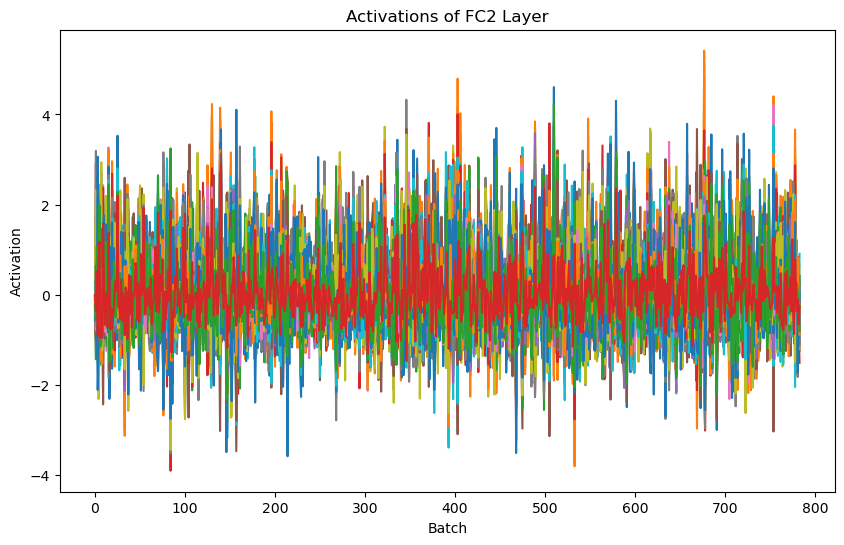

In [16]:
import matplotlib.pyplot as plt

# Forward pass to store activations in xNetwork
images, labels = next(iter(trainloader))

# Transfer the images and labels to the same device as the model
images, labels = images.to(device), labels.to(device)

# Now perform the forward pass
output = model(images)

# Access stored activations for the first layer
# Ensure the keys in xNetwork.node_activations match your model's layer names
fc2_activations = xNetwork.node_activations[model.fc2]


# Visualize activations
plt.figure(figsize=(10, 6))
for i, activation in enumerate(fc2_activations):
    plt.plot(activation, label=f'Neuron {i}')
plt.title('Activations of FC2 Layer')
plt.xlabel('Batch')
plt.ylabel('Activation')
plt.show()
